In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.applications import VGG16

**About VGG16**

VGG16 (also called OxfordNet) is a convolutional neural network architecture named after the Visual Geometry Group from Oxford, who developed it. It was used to win the ILSVR (ImageNet) competition in 2014.

https://keras.io/applications/

**Step 1 : Setting VGG16 convolutional based**

In [3]:
keras.__version__

'2.3.1'

In [4]:
wt_imagenet_file = "H:\Professional Certification\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [5]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

**FEATURE EXTRACTION**

In [7]:
import os, shutil

In [8]:
original_dataset_dir = "H:\Professional Certification\Deep Learning-Udemy-October 2020\PetImages"

In [9]:
base_dir = "H:\Professional Certification\Deep Learning-Udemy-October 2020\cats_dogs_verysmall"

**Run Only Once**

In [ ]:
os.mkdir(base_dir)

**Run Always**

In [10]:
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

**Run Only Once**

In [ ]:
os.mkdir(train_dir)

os.mkdir(validation_dir)

**Run Always**

In [11]:
train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

**Run Only Once**

In [ ]:
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)

os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)

In [16]:
TrainImages_Count = 200 #Change it as per you need
ValImages_End = 300 #Change it as per you need

**Run Always**

In [12]:
orig_dir_cat = os.path.join(original_dataset_dir, 'Cat')
orig_dir_cat

'H:\\Professional Certification\\Deep Learning-Udemy-October 2020\\PetImages\\Cat'

**Run Only Once**

In [18]:
fnames = ['{}.jpg'.format(i) for i in range(TrainImages_Count)]
for fname in fnames:
    src = os.path.join(orig_dir_cat, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.jpg'.format(i) for i in range(TrainImages_Count, ValImages_End)]
for fname in fnames:
    src = os.path.join(orig_dir_cat, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

**Run Always**

In [13]:
orig_dir_dog = os.path.join(original_dataset_dir, 'Dog')
orig_dir_dog

'H:\\Professional Certification\\Deep Learning-Udemy-October 2020\\PetImages\\Dog'

**Run Only Once**

In [20]:
fnames = ['{}.jpg'.format(i) for i in range(TrainImages_Count)]
for fname in fnames:
    src = os.path.join(orig_dir_dog, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.jpg'.format(i) for i in range(TrainImages_Count, ValImages_End)]
for fname in fnames:
    src = os.path.join(orig_dir_dog, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

**Print Information**

In [14]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 200
total training dog images: 200
total validation cat images: 100
total validation dog images: 100


**Step 0 : Ensure to have directories created (train_dir, validation_dir)**

**ref ImageClassification_Convnets_.ipynb (Ref : Previous code)**

**Note**

**The final feature map has shape (4, 4, 512).**

**Step 2a : FEATURE EXTRACTION using numpy array (i.e without DATA AUGMENTATION)**

In [15]:
import os
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator

In [16]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [17]:
def extract_features(directory, sample_count):
    
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape = (sample_count))
    
    generator = datagen.flow_from_directory(
        directory, 
        target_size = (150, 150),
        batch_size = batch_size,
        class_mode = 'binary')
    
    i = 0
    
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        
        i = i + 1
        print("i : ", i)
        
        if i * batch_size >= sample_count:
            print("loop broken")
            break
            
    return features, labels

In [18]:
train_img_cnt = 200 #2000
train_features, train_labels = extract_features(train_dir, train_img_cnt) #2000

Found 400 images belonging to 2 classes.
i :  1
i :  2
i :  3
i :  4
i :  5
i :  6
i :  7
i :  8
i :  9
i :  10
loop broken


In [19]:
val_img_cnt = 100 #2000
validation_features, validation_labels = extract_features(validation_dir, val_img_cnt) #1000

Found 200 images belonging to 2 classes.
i :  1
i :  2
i :  3
i :  4
i :  5
loop broken


**Flatten**

The extracted features are currently of shape (samples, 4, 4, 512)

Before feeding them to a densely connected classifier, first flatten them to (samples, 8192).

In [20]:
train_features = np.reshape(train_features, (train_img_cnt, 4 * 4 * 512))

In [21]:
validation_features = np.reshape(validation_features, (val_img_cnt, 4 * 4 * 512))

**Step 3 : Defining and training densely connected classifier**

In [22]:
from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers

In [23]:
model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [24]:
model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [25]:
# epochs = 30, make it 10 to get a faster execution

history = model.fit(train_features, train_labels, 
                   epochs = 30, batch_size = 20,
                   validation_data = (validation_features, validation_labels))

Instructions for updating:
Use tf.cast instead.
Train on 200 samples, validate on 100 samples
Epoch 1/30
200/200 [==============================] - 2s 9ms/step - loss: 0.8003 - acc: 0.4600 - val_loss: 0.6708 - val_acc: 0.5600
Epoch 2/30
200/200 [==============================] - 0s 2ms/step - loss: 0.6658 - acc: 0.6100 - val_loss: 0.6381 - val_acc: 0.6300
Epoch 3/30
200/200 [==============================] - 0s 2ms/step - loss: 0.6145 - acc: 0.6550 - val_loss: 0.6165 - val_acc: 0.6200
Epoch 4/30
200/200 [==============================] - 0s 2ms/step - loss: 0.5542 - acc: 0.7100 - val_loss: 0.5933 - val_acc: 0.6800
Epoch 5/30
200/200 [==============================] - 0s 2ms/step - loss: 0.5129 - acc: 0.7600 - val_loss: 0.5509 - val_acc: 0.7300
Epoch 6/30
200/200 [==============================] - 0s 2ms/step - loss: 0.5158 - acc: 0.7500 - val_loss: 0.5242 - val_acc: 0.7800
Epoch 7/30
200/200 [==============================] - 0s 2ms/step - loss: 0.4631 - acc: 0.7950 - val_loss: 0.4993 

**Step 4a : Plot the results**

In [26]:
import matplotlib.pyplot as plt

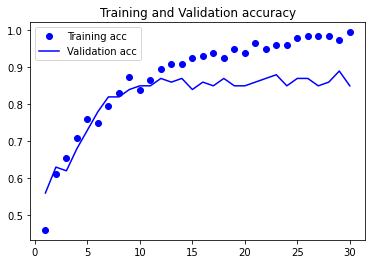

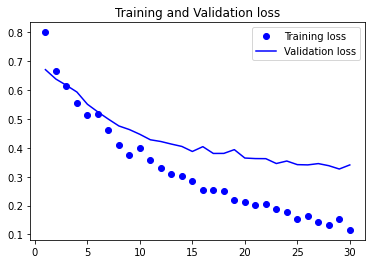

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

**Step 2b : FEATURE EXTRACTION with AUGMENTATION**

Extremely slow and demands CPU / GPU heavily

In [28]:
from keras import models
from keras import layers

In [32]:
model1 = models.Sequential()

In [33]:
model1.add(conv_base)
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation = 'relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))

In [34]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#print('This is the number of trainable weights' 'before freezing the conv base:', len(model1.trainable)

In [38]:
conv_base.trainable = False

In [ ]:
#print('This is the number of trainable weights' 'after freezing the conv base:', len(model1.trainable)

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

In [40]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [41]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 400 images belonging to 2 classes.


In [42]:
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 200 images belonging to 2 classes.


In [43]:
model1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

**fit_generator() is very slow and loads CPU, so run only if really really needed**

In [46]:
#This is extremely slow
history = model1.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=2,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/2
100/100 [==============================] - 1048s 10s/step - loss: 0.5863 - acc: 0.7080 - val_loss: 0.4304 - val_acc: 0.7450
Epoch 2/2
100/100 [==============================] - 968s 10s/step - loss: 0.4459 - acc: 0.8090 - val_loss: 0.4776 - val_acc: 0.7910


In [47]:
import matplotlib.pyplot as plt

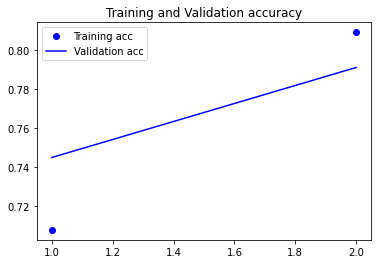

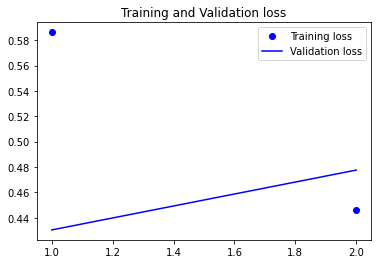

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()